# ESP32 Calibration

Take data with your ESP32 at known frequency. The goal is to match the known frequency to the ESP32's sampling frequency plot. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('SampleData.csv', skiprows = 1) 

Upload your data and plot it with a guess sampling rate.

(0.0, 0.1)

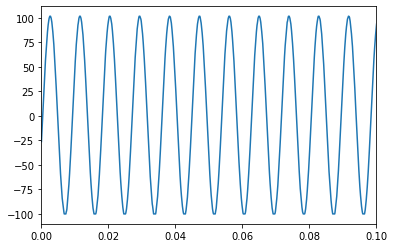

In [ ]:
f_guess = 10000 # Guess Sampling Rate
number_of_values = len(data)
time_per_sample = 1. / f_guess 
time_arr = np.arange(number_of_values) * time_per_sample
data = data - np.mean(data)
plt.plot(time_arr, data)
plt.xlim([0,0.1])


Perform an FFT of your sine wave data to find where the guess sampling frequency places your sive wave signal at.

(0.0, 200000.0)

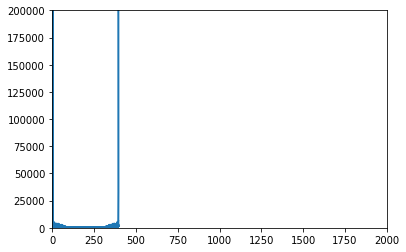

In [ ]:
frequencies = np.arange(number_of_values) * f_guess / number_of_values # Hz
time_arr = np.arange(number_of_values) * time_per_sample
fourier_transform = np.fft.fft(data)
plt.plot(frequencies,np.abs(fourier_transform))
plt.xlim([-1,2000])
plt.ylim([0, 200000])

After performing an FFT, find the peak of the frequency and relcaulate the the true sampling frequency. The true sampling frequency is simply a ratio of Sine wave frequency you created to the frequency the guess sampling rate produced times the guess sampling rate.

$f_{true} = \frac{f_{signal}}{f_{peak}}*f_{guess}$

In [ ]:
f_signal = 100

maxFreqPeak = np.max(np.abs(fourier_transform[1:5000])) # Offset by 1 because large peat at 0

f_peak = frequencies[np.where(np.abs(fourier_transform) == maxFreqPeak)[0]]
print(f_peak[0])
f_true = f_signal/f_peak[0]*f_guess
print(f_true)


4.48760884125921
8913.432835820897


After calculating the new frequency, regenerate your plots to determine if this shifts your singal frequency to the correct position.

(0.0, 2000.0)

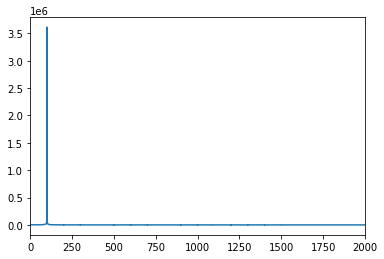

In [ ]:
frequencies = np.arange(number_of_values) * f_true / number_of_values # Hz
time_arr = np.arange(number_of_values) * time_per_sample
fourier_transform = np.fft.fft(data)
plt.plot(frequencies,np.abs(fourier_transform))
plt.xlim([0,2000])

Text(0, 0.5, 'Frequency (Hz)')

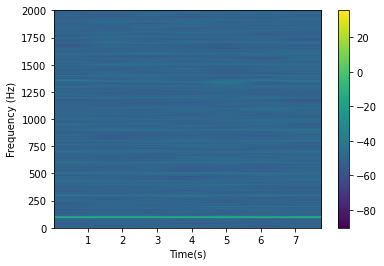

In [ ]:
spectrum, freqs, t, im = plt.specgram(data, Fs = f_true, NFFT = 10000)
plt.colorbar()
plt.ylim([0,2000])
plt.xlabel('Time(s)')
plt.ylabel('Frequency (Hz)')